Chargement et exploration des données

Affichage de 20 lignes aléatoires :


,target,ids,date,flag,user,text
332202,0,2012954358,Tue Jun 02 21:36:57 PDT 2009,NO_QUERY,SassyPerkyMom,"feels sick,tummy hurts.they said it's anxiety...."
991483,4,1835119349,Mon May 18 05:11:27 PDT 2009,NO_QUERY,millyjohnson,@Judyastley Stop at the husband if he's nice -...
75274,0,1695106145,Mon May 04 05:13:11 PDT 2009,NO_QUERY,vendibley,not to happy about the rain
1084966,4,1969077295,Fri May 29 22:58:26 PDT 2009,NO_QUERY,austinrooney,Tonight was such a good night ! Movie dinner a...
833963,4,1557859421,Sun Apr 19 06:19:22 PDT 2009,NO_QUERY,jamiemoore,"@technicalfault yeah i have the same problem, ..."
510558,0,2189678371,Tue Jun 16 00:37:28 PDT 2009,NO_QUERY,Fluffy_Cupycake,@sandramm85 i hope it doesn't come to that.. i...
520524,0,2192130267,Tue Jun 16 06:33:27 PDT 2009,NO_QUERY,Pickerdo,I need a cd player.
938012,4,1793351877,Thu May 14 02:21:33 PDT 2009,NO_QUERY,sedatedtimes,@beenieweenie Crap! I forgot today was Thursda...
1348466,4,2044874589,Fri Jun 05 09:56:05 PDT 2009,NO_QUERY,PaigeWearsPrada,Driving though the 303! Lots of traffic! Oh boy
744903,0,2267274008,Sun Jun 21 09:54:42 PDT 2009,NO_QUERY,swanies,Discovered the van had a dead battery after we...


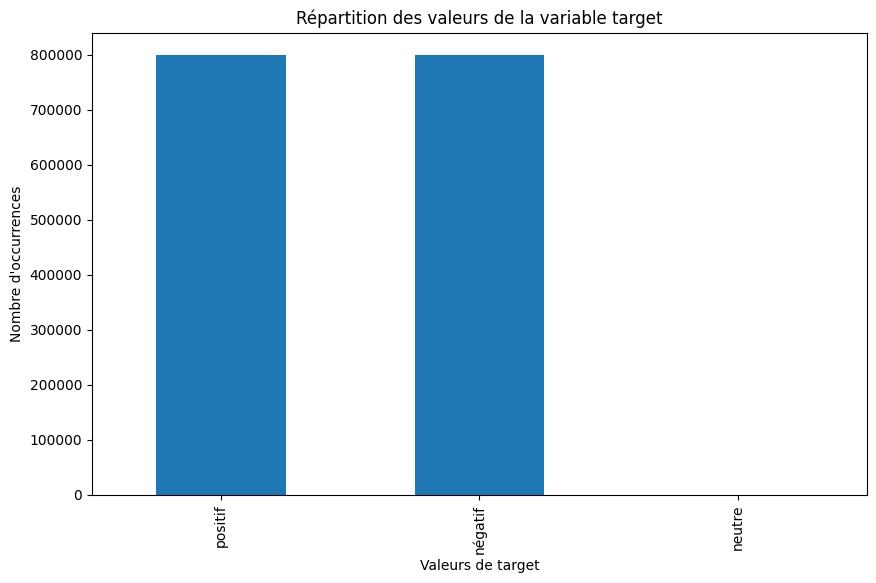

Statistiques descriptives :


,target,ids,date,flag,user,text
count,1600018,1600018,1600018,1600018,1600018,1600018
unique,3,1598316,774364,2,659776,1581467
top,positif,ids,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,800000,18,20,1600000,549,210


Valeurs manquantes par colonne :


target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Chemin du fichier
file_path = 'Dataset_Init.csv'

# Les titres que vous souhaitez ajouter
headers = ["target", "ids", "date", "flag", "user", "text"]

# Lire les données existantes
with open(file_path, "r", encoding="utf-8") as file:
    data = file.readlines()

# Écrire les titres et ajouter les anciennes données
with open(file_path, "w", encoding="utf-8") as file:
    # Ajouter les titres
    file.write(",".join(headers) + "\n")
    # Ajouter les anciennes données
    file.writelines(data)

# Spécifiez les types de données pour les colonnes 0 et 1
dtype_spec = {
    "target": 'str',
    "ids": 'str'
}

# Lire le fichier CSV avec les types de données spécifiés
df = pd.read_csv(file_path, dtype=dtype_spec, low_memory=False)

# Sélectionner 20 lignes aléatoires
random_rows = df.sample(n=20)

# Afficher les lignes sélectionnées
print("Affichage de 20 lignes aléatoires :")
display(random_rows)

# Regroupement des valeurs de la colonne 'target' en catégories
df['target'] = df['target'].apply(lambda x: 'positif' if x == '4' else 'négatif' if x == '0' else 'neutre')

# Assurez-vous que toutes les catégories sont présentes
df['target'] = pd.Categorical(df['target'], categories=['positif', 'négatif', 'neutre'])

# Compter les occurrences de chaque valeur dans la colonne 'target'
target_counts = df['target'].value_counts()

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
ax = target_counts.plot(kind='bar')
plt.title('Répartition des valeurs de la variable target')
plt.xlabel('Valeurs de target')
plt.ylabel('Nombre d\'occurrences')

# Modifier les noms des colonnes en abscisse
ax.set_xticklabels(['positif', 'négatif', 'neutre'])

plt.show()

# Afficher les statistiques descriptives
print("Statistiques descriptives :")
display(df.describe(include='all'))

# Afficher les valeurs manquantes
print("Valeurs manquantes par colonne :")
display(df.isnull().sum())

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Spécifier les types de données des colonnes
dtype_spec = {
    "target": 'str',
    "ids": 'str'
}

# Charger le fichier CSV dans un DataFrame avec les types de données spécifiés
df = pd.read_csv('Dataset_Init.csv', dtype=dtype_spec, low_memory=False)

# Convertir la colonne 'target' en type string
df['target'] = df['target'].astype(str)

# Diviser le DataFrame en 632 000 lignes tout en maintenant l'équilibre de la colonne 'target'
df_sampled, _ = train_test_split(df, train_size=632000, stratify=df['target'], random_state=42)

# Afficher les premières lignes du DataFrame échantillonné
display(df_sampled.head())

,target,ids,date,flag,user,text
1166781,4,1979988153,Sun May 31 05:17:00 PDT 2009,NO_QUERY,chocolateblood,"finally having my breakfast now: eggs, toast &..."
389482,0,2054461461,Sat Jun 06 07:24:15 PDT 2009,NO_QUERY,kafun8d,has to stay at work later bc 2 ppl called off
616780,0,2226790032,Thu Jun 18 12:23:23 PDT 2009,NO_QUERY,katierosss,@symphnysldr i feel your pain
328787,0,2010868164,Tue Jun 02 18:05:59 PDT 2009,NO_QUERY,xotawny,"@mariaonthego, That sucks"
385660,0,2053646874,Sat Jun 06 05:15:31 PDT 2009,NO_QUERY,Maximusprime27,Why do I have no followers??


Installation des packages

In [3]:
import subprocess
import sys

def install(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "--upgrade", package])
    except subprocess.CalledProcessError as e:
        print(f"Error installing {package}: {e}")

# Liste des packages à installer
packages = [
    "numpy",
    "pandas",
    "nltk",
    "gensim",
    "transformers",
    "torch",
    "tensorflow_hub",
    "matplotlib",
    "scikit-learn"
]

# Installation des packages
for package in packages:
    install(package)

# Téléchargement des ressources NLTK
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\creus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\creus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\creus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Remplacer les URLs par le mot "URL"
    text = re.sub(r'http\S+|www\S+|https\S+', 'URL', text, flags=re.MULTILINE)
    # Remplacer les mentions par le mot "mention"
    text = re.sub(r'\@\w+', 'mention', text)
    # Remplacer les hashtags par le mot "hashtag"
    text = re.sub(r'\#\w+', 'hashtag', text)
    # Suppression des caractères spéciaux et des chiffres
    text = re.sub(r'[^A-Za-z\s]', '', text)
    # Conversion en minuscules
    text = text.lower()
    # Tokenisation
    tokens = word_tokenize(text)
    # Suppression des stopwords et de la ponctuation
    tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    # Stemming et lemmatization
    tokens = [stemmer.stem(word) for word in tokens]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Exemple d'utilisation
df['cleaned_text'] = df['text'].apply(clean_text)
df_sampled['cleaned_text'] = df_sampled['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\creus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\creus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\creus\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Word2Vec

In [5]:
import numpy as np
from gensim.models import Word2Vec

# Entraînement du modèle Word2Vec
model_w2v = Word2Vec(sentences=df_sampled['cleaned_text'], vector_size=100, window=5, min_count=1, workers=4)

# Conversion des tweets en vecteurs
df_sampled['w2v'] = df_sampled['cleaned_text'].apply(lambda x: model_w2v.wv[x].mean(axis=0) if len(x) > 0 else np.zeros(100))

In [14]:
from transformers import BertTokenizer, BertModel
import torch

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model_bert = BertModel.from_pretrained('bert-base-uncased')

def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True)
    outputs = model_bert(**inputs)
    return outputs.last_hidden_state.mean(dim=1).detach().numpy()

df_sampled['bert'] = df_sampled['text'].apply(lambda x: get_bert_embeddings(x).flatten())

In [7]:
import tensorflow_hub as hub

model_use = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/TensorFlow2/universal-sentence-encoder/2")

def get_use_embeddings(text):
    return model_use([text]).numpy()[0]

df_sampled['use'] = df_sampled['text'].apply(get_use_embeddings)

In [12]:
# Charger les vecteurs GloVe
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
import numpy as np

glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.word2vec.txt'
glove2word2vec(glove_input_file, word2vec_output_file)
model_glove = KeyedVectors.load_word2vec_format(word2vec_output_file, binary=False)

# Construire un dictionnaire des vecteurs pour les mots utilisés
vocab = set(word for tokens in df_sampled['cleaned_text'] for word in tokens)
word_vectors = {word: model_glove[word] for word in vocab if word in model_glove}

# Fonction optimisée
def get_glove_embeddings(tokens):
    vectors = [word_vectors[word] for word in tokens if word in word_vectors]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

df_sampled['glove'] = df_sampled['cleaned_text'].apply(get_glove_embeddings)

C:\Users\creus\AppData\Local\Temp\ipykernel_14468\2759667374.py:8: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input_file, word2vec_output_file)


FastText

In [13]:
import numpy as np
from gensim.models import FastText

# Entraînement du modèle FastText
model_fasttext = FastText(sentences=df_sampled['cleaned_text'], vector_size=100, window=5, min_count=1, workers=4)

# Conversion des tweets en vecteurs FastText
df_sampled['fasttext'] = df_sampled['cleaned_text'].apply(lambda x: model_fasttext.wv[x].mean(axis=0) if len(x) > 0 else np.zeros(100))

Évaluation des performances via ARI et t-SNE

ARI Word2Vec: 0.01988096077031077
ARI BERT: 0.03042857159665595
ARI USE: 0.010489897749018524
ARI GloVe: 0.008082538712122386
ARI FastText: 0.03093878640423779


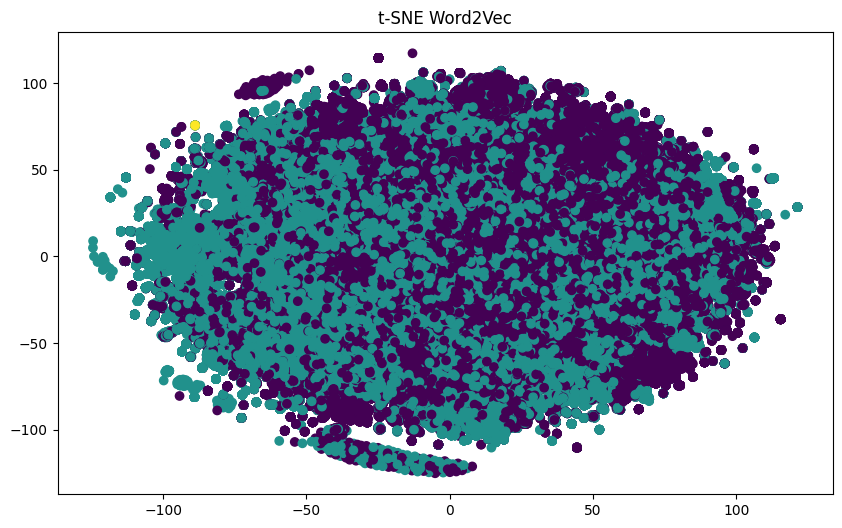

KeyboardInterrupt: 

In [15]:
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Utilisation de la variable target comme étiquettes
true_labels = df_sampled['target'].astype('category').cat.codes

# Convertir les colonnes d'embeddings en numpy arrays
w2v_embeddings = np.vstack(df_sampled['w2v'].values)
bert_embeddings = np.vstack(df_sampled['bert'].values)
use_embeddings = np.vstack(df_sampled['use'].values)
glove_embeddings = np.vstack(df_sampled['glove'].values)
fasttext_embeddings = np.vstack(df_sampled['fasttext'].values)

# Normaliser les embeddings
scaler = StandardScaler()
w2v_embeddings_scaled = scaler.fit_transform(w2v_embeddings)
bert_embeddings_scaled = scaler.fit_transform(bert_embeddings)
use_embeddings_scaled = scaler.fit_transform(use_embeddings)
glove_embeddings_scaled = scaler.fit_transform(glove_embeddings)
fasttext_embeddings_scaled = scaler.fit_transform(fasttext_embeddings)

# Clustering avec KMeans sur les embeddings normalisés
n_clusters = len([label for label in np.unique(true_labels) if np.sum(true_labels == label) > 0])
kmeans_w2v = KMeans(n_clusters=n_clusters, random_state=42).fit(w2v_embeddings_scaled)
kmeans_bert = KMeans(n_clusters=n_clusters, random_state=42).fit(bert_embeddings_scaled)
kmeans_use = KMeans(n_clusters=n_clusters, random_state=42).fit(use_embeddings_scaled)
kmeans_glove = KMeans(n_clusters=n_clusters, random_state=42).fit(glove_embeddings_scaled)
kmeans_fasttext = KMeans(n_clusters=n_clusters, random_state=42).fit(fasttext_embeddings_scaled)

# Exemple d'évaluation avec ARI
ari_w2v = adjusted_rand_score(true_labels, kmeans_w2v.labels_)
ari_bert = adjusted_rand_score(true_labels, kmeans_bert.labels_)
ari_use = adjusted_rand_score(true_labels, kmeans_use.labels_)
ari_glove = adjusted_rand_score(true_labels, kmeans_glove.labels_)
ari_fasttext = adjusted_rand_score(true_labels, kmeans_fasttext.labels_)

print(f"ARI Word2Vec: {ari_w2v}")
print(f"ARI BERT: {ari_bert}")
print(f"ARI USE: {ari_use}")
print(f"ARI GloVe: {ari_glove}")
print(f"ARI FastText: {ari_fasttext}")

# Visualisation avec t-SNE
def plot_tsne(embeddings, labels, title):
    tsne = TSNE(n_components=2, random_state=42)
    reduced_embeddings = tsne.fit_transform(embeddings)
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='viridis')
    plt.title(title)
    plt.show()

# Exemple de visualisation
plot_tsne(w2v_embeddings, true_labels, 't-SNE Word2Vec')
plot_tsne(bert_embeddings, true_labels, 't-SNE BERT')
plot_tsne(use_embeddings, true_labels, 't-SNE USE')
plot_tsne(glove_embeddings, true_labels, 't-SNE GloVe')
plot_tsne(fasttext_embeddings, true_labels, 't-SNE FastText')

Tests de 3 modèles via MLFlow

Initialisation MLFlow

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import mlflow
import mlflow.tensorflow
import pandas as pd
import numpy as np

C:\Users\creus\OneDrive\Bureau\IA\7e projet\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading and Preprocessing Data

In [9]:
# Utilisation des embeddings USE de df_sampled
X = np.vstack(df_sampled['use'].values)
y = df_sampled['target'].values

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initializing MLFlow

In [10]:
# Initialize MLFlow
mlflow.set_experiment("Experimentation_projet_7")

<Experiment: artifact_location='file:///C:/Users/creus/OneDrive/Bureau/IA/7e%20projet/mlruns/620427133914755322', creation_time=1736084105350, experiment_id='620427133914755322', last_update_time=1736084105350, lifecycle_stage='active', name='Experimentation_projet_7', tags={}>

Logistic Regression Model

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import mlflow

# Convertir d'abord les étiquettes en numérique si elles sont en string
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Convertir les étiquettes 4 en 1
y_train = np.where(y_train == 4, 1, 0)  # Convertit explicitement en binaire 0/1
y_test = np.where(y_test == 4, 1, 0)    # Convertit explicitement en binaire 0/1

# Modèle de Régression Logistique
with mlflow.start_run(run_name="Logistic_Regression_USE"):
    model_lr = LogisticRegression(random_state=42)
    model_lr.fit(X_train, y_train)
    
    # Prédictions sur l'ensemble d'entraînement
    y_pred_lr = model_lr.predict(X_train)
    y_pred_proba_lr = model_lr.predict_proba(X_train)[:, 1]  # Probabilités pour la classe positive
    
    # Calcul des métriques
    f1_lr = f1_score(y_train, y_pred_lr)
    precision_lr = precision_score(y_train, y_pred_lr)
    recall_lr = recall_score(y_train, y_pred_lr)
    auc_lr = roc_auc_score(y_train, y_pred_proba_lr)
    
    # Logging des métriques dans MLflow
    mlflow.log_metric("f1_score", f1_lr)
    mlflow.log_metric("precision", precision_lr)
    mlflow.log_metric("recall", recall_lr)
    mlflow.log_metric("auc", auc_lr)
    
    # Sauvegarde du modèle
    mlflow.sklearn.log_model(model_lr, "model")

LSTM Model

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import mlflow

# Conversion des étiquettes en format binaire 0/1
y_train_lstm = np.where(y_train == 4, 1, 0)
y_test_lstm = np.where(y_test == 4, 1, 0)

# LSTM Model
with mlflow.start_run(run_name="LSTM"):
    # Définition du modèle
    model_lstm = Sequential([
        Embedding(5000, 100, weights=[embedding_matrix], input_length=100, trainable=False),
        SpatialDropout1D(0.2),
        LSTM(100, dropout=0.2, recurrent_dropout=0.2),
        Dense(1, activation='sigmoid')
    ])
    
    # Compilation du modèle
    model_lstm.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=['accuracy']
    )
    
    # Callback pour early stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights=True,
        verbose=1
    )
    
    # Entraînement du modèle
    history = model_lstm.fit(
        X_train,
        y_train_lstm,
        epochs=10,
        batch_size=64,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=1
    )
    
    # Prédictions
    y_pred_proba = model_lstm.predict(X_test)
    y_pred_lstm = (y_pred_proba > 0.5).astype("int32")
    
    # Calcul des métriques
    f1_lstm = f1_score(y_test_lstm, y_pred_lstm)
    precision_lstm = precision_score(y_test_lstm, y_pred_lstm)
    recall_lstm = recall_score(y_test_lstm, y_pred_lstm)
    auc_lstm = roc_auc_score(y_test_lstm, y_pred_proba)
    
    # Logging des paramètres
    mlflow.log_param("num_words", 5000)
    mlflow.log_param("embedding_dim", 100)
    mlflow.log_param("maxlen", 100)
    mlflow.log_param("lstm_units", 100)
    mlflow.log_param("dropout_rate", 0.2)
    
    # Logging des métriques
    mlflow.log_metric("f1_score", f1_lstm)
    mlflow.log_metric("precision", precision_lstm)
    mlflow.log_metric("recall", recall_lstm)
    mlflow.log_metric("auc", auc_lstm)
    
    # Logging des métriques d'entraînement
    for epoch, (loss, val_loss) in enumerate(zip(history.history['loss'], history.history['val_loss'])):
        mlflow.log_metric(f"train_loss_epoch_{epoch+1}", loss)
        mlflow.log_metric(f"val_loss_epoch_{epoch+1}", val_loss)
    
    # Sauvegarde du modèle au format HDF5
    model_lstm.save("model_lstm.h5")
    mlflow.log_artifact("model_lstm.h5")

NameError: name 'embedding_matrix' is not defined

In [ ]:
import tensorflow as tf
import numpy as np

# Define the model architecture
new_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(512,), name='input_layer_2'),
    tf.keras.layers.Embedding(
        input_dim=5000,  # Vocabulary size
        output_dim=100,  # Embedding dimension
        name='embedding_3'
    ),
    tf.keras.layers.SpatialDropout1D(0.3, name='spatial_dropout1d_3'),
    tf.keras.layers.LSTM(100, name='lstm_3'),
    tf.keras.layers.Dense(1, activation='sigmoid', name='dense_7')
])

# Load the original model
original_model = tf.keras.models.load_model('model_lstm.h5')

# Copy the weights from the original model to the new model
for i in range(len(original_model.layers)):
    try:
        new_model.layers[i].set_weights(original_model.layers[i].get_weights())
    except Exception as e:
        print(f"Error copying weights for layer {i}: {str(e)}")

# Compile the model
new_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Save the new model in the recommended Keras format
new_model.save("model_lstm_compatible.h5")

# Verify that the model has been saved correctly
test_model = tf.keras.models.load_model('model_lstm_compatible.keras')
print("New model created and saved successfully!")

# Display the summary of the new model for verification
test_model.summary()

In [ ]:
import tensorflow as tf

# Charger votre modèle
model = tf.keras.models.load_model('model_lstm.h5')

# Afficher la structure du modèle
model.summary()

BERT Model

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
import mlflow
import numpy as np
import os

# Désactiver la journalisation automatique de mlflow.tensorflow
mlflow.tensorflow.autolog(disable=True)

# Conversion des étiquettes en format binaire 0/1
y_train_bert = np.where(y_train == 4, 1, 0)
y_test_bert = np.where(y_test == 4, 1, 0)

# Démarrer une session MLflow
with mlflow.start_run(run_name="BERT_approach_fast"):
    # Charger le tokenizer et le modèle de base BERT
    tokenizer_bert = BertTokenizer.from_pretrained('bert-base-uncased')
    
    # Convertir les données en liste de strings si ce n'est pas déjà le cas
    if isinstance(X_train[0], str):
        X_train_texts = X_train[:1000]  # Limiter à 1000 échantillons pour l'entraînement
        X_test_texts = X_test[:200]     # Limiter à 200 échantillons pour le test
    else:
        X_train_texts = [str(text) for text in X_train[:1000]]
        X_test_texts = [str(text) for text in X_test[:200]]
    
    # Ajuster les labels en conséquence
    y_train_bert = y_train_bert[:1000]
    y_test_bert = y_test_bert[:200]
    
    # Tokenizer avec une longueur maximale réduite
    train_encodings = tokenizer_bert(
        X_train_texts, 
        truncation=True, 
        padding=True, 
        max_length=128,  # Réduit de 512 à 128
        return_tensors="tf"
    )
    test_encodings = tokenizer_bert(
        X_test_texts, 
        truncation=True, 
        padding=True, 
        max_length=128,  # Réduit de 512 à 128
        return_tensors="tf"
    )

    # Augmenter la taille du batch pour plus de rapidité
    train_dataset = tf.data.Dataset.from_tensor_slices((
        dict(train_encodings),
        y_train_bert
    )).batch(32)  # Augmenté de 16 à 32

    test_dataset = tf.data.Dataset.from_tensor_slices((
        dict(test_encodings),
        y_test_bert
    )).batch(32)  # Augmenté de 16 à 32

    class BertClassifier(tf.keras.Model):
        def __init__(self, bert_model):
            super().__init__()
            self.bert = bert_model
            self.dropout = tf.keras.layers.Dropout(0.1)
            self.classifier = Dense(1, activation='sigmoid')
            
        def call(self, inputs, training=False):
            input_ids = tf.cast(inputs['input_ids'], tf.int32)
            attention_mask = tf.cast(inputs['attention_mask'], tf.int32)
            
            outputs = self.bert(
                input_ids=input_ids, 
                attention_mask=attention_mask,
                training=False
            )
            
            pooled_output = outputs[1]
            pooled_output = self.dropout(pooled_output, training=training)
            return self.classifier(pooled_output)

    base_model = TFBertModel.from_pretrained('bert-base-uncased')
    model_bert = BertClassifier(base_model)

    optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5)  # Légèrement augmenté
    loss = tf.keras.losses.BinaryCrossentropy()
    metrics = [tf.keras.metrics.BinaryAccuracy(name="accuracy")]  # Réduit le nombre de métriques

    model_bert.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=1,  # Réduit de 2 à 1
        restore_best_weights=True
    )

    history = model_bert.fit(
        train_dataset,
        epochs=2,  # Réduit de 3 à 2
        validation_data=test_dataset,
        callbacks=[early_stopping]
    )

    y_pred_proba = model_bert.predict(test_dataset, batch_size=32).ravel()
    y_pred_bert = (y_pred_proba > 0.5).astype("int32")

    # Calculer les métriques finales
    f1_bert = f1_score(y_test_bert, y_pred_bert)
    precision_bert = precision_score(y_test_bert, y_pred_bert)
    recall_bert = recall_score(y_test_bert, y_pred_bert)
    auc_bert = roc_auc_score(y_test_bert, y_pred_proba)

    # Logger les métriques et paramètres
    mlflow.log_param("model_type", "BERT_fast")
    mlflow.log_param("max_length", 128)
    mlflow.log_param("batch_size", 32)
    mlflow.log_param("epochs", 2)
    mlflow.log_param("training_samples", 1000)
    mlflow.log_param("test_samples", 200)

    mlflow.log_metric("f1_score", f1_bert)
    mlflow.log_metric("precision", precision_bert)
    mlflow.log_metric("recall", recall_bert)
    mlflow.log_metric("auc", auc_bert)

    weights_path = "bert_model_weights.weights.h5"
    model_bert.save_weights(weights_path)
    if os.path.exists(weights_path):
        mlflow.log_artifact(weights_path)
        os.remove(weights_path)